In [1]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library

In [2]:
# read the file using pandas
df =  pd.read_csv('/content/sleep_health_data.csv')
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [3]:
# check headedr / first row
df.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN


In [4]:
# checking the values of the occupation
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


In [5]:
# Calculating the average sleep duration per occupation
avg_sleep_duration_per_occupation = df.groupby('Occupation')['Sleep Duration'].mean()
avg_sleep_duration_per_occupation

,Sleep Duration
Occupation,
Accountant,7.113514
Doctor,6.970423
Engineer,7.987302
Lawyer,7.410638
Manager,6.900000
Nurse,7.063014
Sales Representative,5.900000
Salesperson,6.403125
Scientist,6.000000


In [6]:
# Sorting the sleep duration per occupation

avg_sleep_duration_per_occupation_sorted = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=False)
avg_sleep_duration_per_occupation_sorted

,Sleep Duration
Occupation,
Engineer,7.987302
Lawyer,7.410638
Accountant,7.113514
Nurse,7.063014
Doctor,6.970423
Manager,6.900000
Software Engineer,6.750000
Teacher,6.690000
Salesperson,6.403125


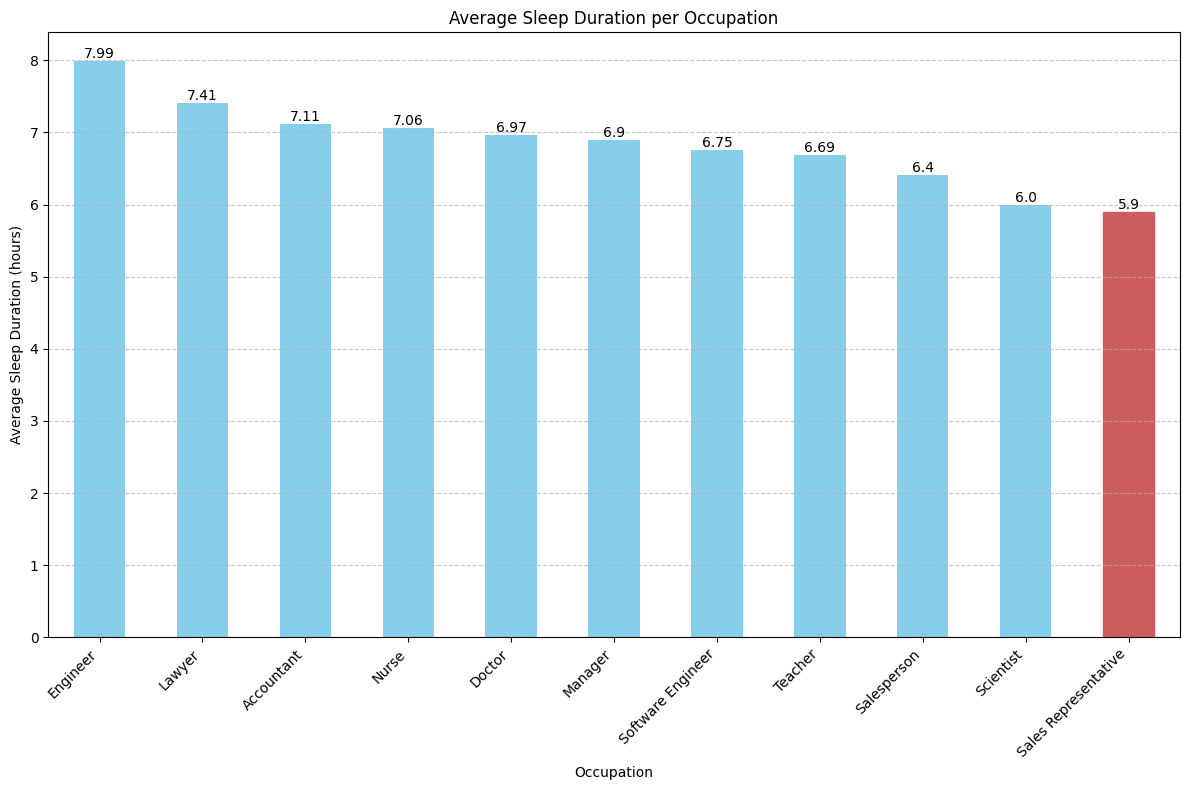

In [7]:
# Plotting the distribution of average sleep duration per occupation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bars = avg_sleep_duration_per_occupation_sorted.plot(kind='bar', color='skyblue')

# Highlight the bar with the lowest average sleep duration
bars_patches = bars.patches
bars_patches[avg_sleep_duration_per_occupation_sorted.index.get_loc(avg_sleep_duration_per_occupation_sorted.idxmin())].set_color('indianred')

# Adding labels on top of the bars
for bar in bars_patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Sleep Duration per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# Finding the occupation with the lowest average sleeping duration
lowest_sleep_occ = avg_sleep_duration_per_occupation.idxmin()
lowest_sleep_occ

'Sales Representative'

In [9]:
# Calculating the average quality of sleep
avg_sleep_quality_per_occupation = df.groupby('Occupation')['Quality of Sleep'].mean()
avg_sleep_quality_per_occupation

,Quality of Sleep
Occupation,
Accountant,7.891892
Doctor,6.647887
Engineer,8.412698
Lawyer,7.893617
Manager,7.000000
Nurse,7.369863
Sales Representative,4.000000
Salesperson,6.000000
Scientist,5.000000


In [10]:
# Sorting the sleep quality per occupation

avg_sleep_quality_per_occupation_sorted = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)
avg_sleep_quality_per_occupation_sorted

,Quality of Sleep
Occupation,
Engineer,8.412698
Lawyer,7.893617
Accountant,7.891892
Nurse,7.369863
Manager,7.000000
Teacher,6.975000
Doctor,6.647887
Software Engineer,6.500000
Salesperson,6.000000


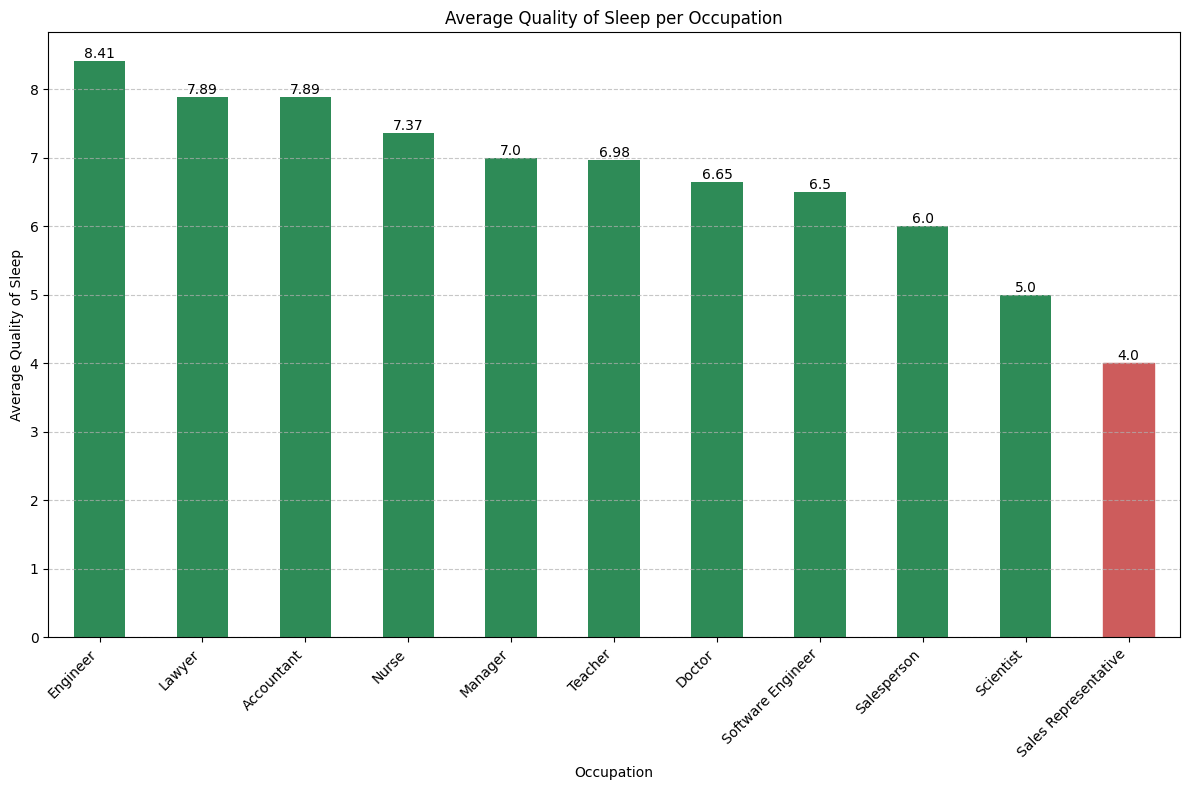

In [11]:
# Plotting the distribution of average sleep quality per occupation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bars = avg_sleep_quality_per_occupation_sorted.plot(kind='bar', color='seagreen')

# Highlight the bar with the lowest average sleep duration
bars_patches = bars.patches
bars_patches[avg_sleep_quality_per_occupation_sorted.index.get_loc(avg_sleep_quality_per_occupation_sorted.idxmin())].set_color('indianred')

# Adding labels on top of the bars
for bar in bars_patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Quality of Sleep per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# Finding the occupation with the lowest average quality of sleep

lowest_sleep_quality_occ = avg_sleep_quality_per_occupation.idxmin()
lowest_sleep_quality_occ

'Sales Representative'

In [13]:
# Checking if lowest_sleep_quality_occ and lowest_quality_occ are the same

same_occ = lowest_sleep_occ == lowest_sleep_quality_occ
same_occ

True

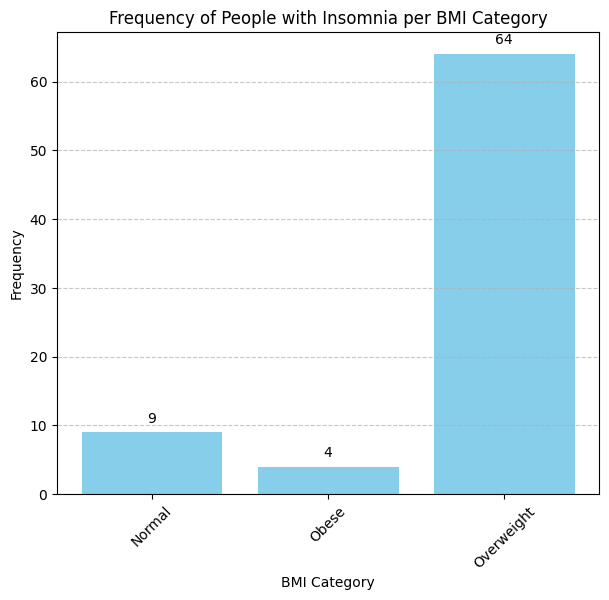

In [17]:
import matplotlib.pyplot as plt

# Getting the frequency of people with Insomnia per BMI category
insomnia_df = df[df['Sleep Disorder'] == 'Insomnia']
insomnia_frequency = insomnia_df['BMI Category'].value_counts().sort_index()

# Plot the frequency as a bar graph
plt.figure(figsize=(7, 6))
bars = plt.bar(insomnia_frequency.index, insomnia_frequency.values, color='skyblue')
plt.title('Frequency of People with Insomnia per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

In [18]:
# Calculate the ratio of app users in each BMI Category who have been diagnosed with Insomnia
bmi_insomnia_ratios = {}
bmi_categories = df['BMI Category'].unique()

for category in bmi_categories:
    total_people = df[df['BMI Category'] == category].shape[0]
    insomnia_people = insomnia_df[insomnia_df['BMI Category'] == category].shape[0]
    ratio = round(insomnia_people / total_people, 2) if total_people > 0 else 0
    bmi_insomnia_ratios[category] = ratio

# Ensure bmi_insomnia_ratios has exactly three items
if len(bmi_insomnia_ratios) > 3:
    bmi_insomnia_ratios = dict(list(bmi_insomnia_ratios.items())[:3])
elif len(bmi_insomnia_ratios) < 3:
    missing_items = 3 - len(bmi_insomnia_ratios)
    for i in range(missing_items):
        insomnia_bmi_ratios[f"Category_{i+1}"] = 0

bmi_insomnia_ratios

{'Overweight': 0.43, 'Normal': 0.04, 'Obese': 0.4}